# Project Overview
This is a project overview for a customer churn prediction project in a telco company. 

## Project Objective: 
The main objective of the project is to develop a predictive model that will identify customers that are most likely to churn thus enabling the Telco to develop strategies of retention and improve its business performance.

## Data Source: 
The data usde for the project is obtained from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) which includes data on: state, account length, area code, phone number,
       international plan, voice mail plan, number vmail messages,
       total day minutes, total day calls, total day charge,
       total eve minutes, total eve calls, total eve charge,
       total night minutes, total night calls, total night charge,
       total intl minutes, total intl calls, total intl charge,
       customer service calls and churn.

## Methods: 
The project uses the CRISP-DM (Cross-Industry Standard Process for Data Mining) process, which stages include: data understanding, data preparation, modeling, evaluation, and deployment. 
The modeling phase will involve building and evaluating various predictive models, starting with a basic logistic regression to a relatively complex models like Decision Trees. The performance of the models will be assessed using metrics such as accuracy, precision, recall, and F1-score.

## Deliverables: 
The final deliverables of this project will include a predictive model that can be used for customer churn prediction and a presentation summarizing the key findings and recommendations for the company.

## Timeline: 
The project is expected to take 4 days to complete.


# Business Problem
The business problem is to identify customers in a telco company who are most likely to churn (Number of customers who are likely to stop purchasing the business's services), to enable the telco develop strategies to retain them and improve performance.

# Data Understanding
## Loading the Data

In [2]:
# importing the pandas library
import pandas as pd

# reading the csv file
data = pd.read_csv('/content/telco_chum.csv')

# previewing the first 5 rows
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data description


In [3]:
# shape of the data
print(f'The data has {data.shape[0]} records and {data.shape[1]} columns')

The data has 3333 records and 21 columns


In [4]:
# data types of the columns
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
# checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# checking for duplicates
data.duplicated().sum()

0

### Dropping columns

Dropped the account length, phone number columns and state columns because:
* The phone number does not provide information about customer behavior while 
* The account length isnt a certain measure of how long the client has been a customer for this case. And it wouldnt be a valid assumption without further information.
* The area code and state in the dataset limits the predictions within the given areas and states making prediction outside the defined locations impossible.

In [7]:
data.drop(['account length', 'phone number', 'area code', 'state'], axis=1, inplace=True)

## Data exploration

In [8]:
# categorical columns
cat_columns = [ 'international plan', 
                'voice mail plan', 
                'churn']
# continuous columns
cont_columns = ['number vmail messages', 
                'total day minutes', 
                'total day calls', 
                'total day charge',
                'total eve minutes',
                'total eve calls',
                'total eve charge',
                'total night minutes',
                'total night calls',
                'total night charge',
                'total intl minutes',
                'total intl calls',
                'total intl charge',
                'customer service calls']

### Distribution of the continuous variables

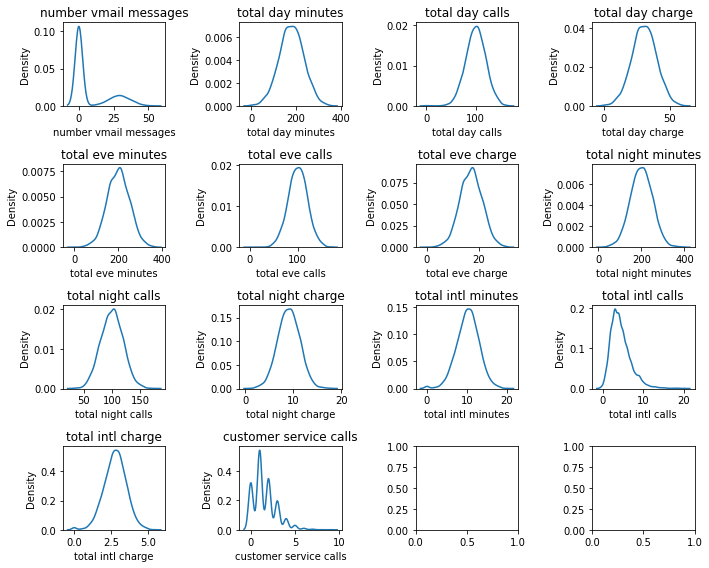

In [9]:
# import seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
cols = cont_columns

# Set the number of rows and columns for the subplots
nrows = 4
ncols = 4

# Create the figure and axis objects
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axis array so that it can be iterated over easily
ax = ax.flatten()

# Loop over the columns and plot a density graph for each one
for i, col in enumerate(cols):
    sns.kdeplot(data[col], ax=ax[i])
    ax[i].set_title(col)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


From the above distributions most of the columns are normally distributed except for num of vmail messages, total intl calls and customer service calls which have a right skew.

### Distribution of the categorical variables

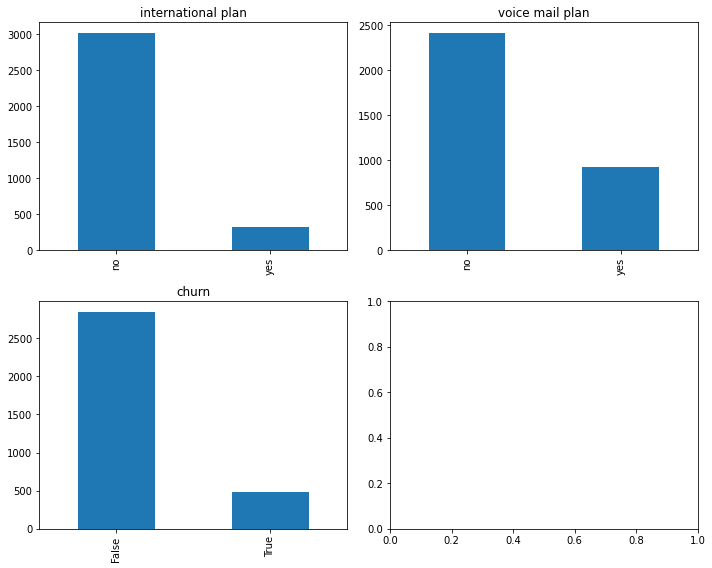

In [10]:
# Select the columns to plot
cols = cat_columns

# Set the number of rows and columns for the subplots
nrows = 2
ncols = 2

# Create the figure and axis objects
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axis array so that it can be iterated over easily
ax = ax.flatten()

# Loop over the columns and plot a density graph for each one
for i, col in enumerate(cols):
    data[col].value_counts().plot(kind='bar', ax=ax[i])
    ax[i].set_title(col)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

The distribution of the international plan, voice mail plan and churn is imbalanced with yes and true outcomes having less values.

# Data Cleaning and Preparation
The data has no missing data or duplicates, however there are outliers in the right-skewed continous columns.
There is also imbalance in the categorical columns.

## Normalizing the continuous features

In [11]:
from sklearn.preprocessing import StandardScaler

# create an instance of the scaler
scaler = StandardScaler()

# tranforming the data
data[cont_columns] = scaler.fit_transform(data[cont_columns])

## Encoding Categorical Columns

In [12]:
data = pd.get_dummies(data, columns=cat_columns, drop_first=True)

data.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn_True
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0,0


# Modelling
### Importing Modelling and Evaluation Libraries

In [13]:
# importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Defining our Predators and Target features

In [14]:
# target
y = data['churn_True']

# predators
X = data.drop('churn_True', axis=1)

### Performing the Train Test Split

In [15]:
# train test split with random state set at 42 and test size at 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

### Fitting the Model

In [16]:
# creating an instance of a Logistic Regression model
lr = LogisticRegression()

# fitting the model on the train data
lr.fit(X_train, y_train)

LogisticRegression()

### Making Predictions

In [17]:
# making predictions using the test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Model Evaluation

In [18]:
# evaluating the model
train_f1_score = f1_score(y_train, y_train_pred)
test_f1_score = f1_score(y_test, y_test_pred)

train_acc_score = accuracy_score(y_train, y_train_pred)
test_acc_score = accuracy_score(y_test, y_test_pred)

train_prec_score = precision_score(y_train, y_train_pred)
test_prec_score = precision_score(y_test, y_test_pred)

train_rec_score = recall_score(y_train, y_train_pred)
test_rec_score = recall_score(y_test, y_test_pred)

print(f'The F1 Score of the Train Data is {train_f1_score}')
print(f' The F1 Score of the Test Data is {test_f1_score}')

print("**************************************************")

print(f'The Accuracy Score of the Train Data is {train_acc_score}')
print(f' The Accuracy Score of the Test Data is {test_acc_score}')

print("**************************************************")

print(f'The Precision Score of the Train Data is {train_prec_score}')
print(f' The Precision Score of the Test Data is {test_prec_score}')

print("**************************************************")

print(f'The Recall Score of the Train Data is {train_rec_score}')
print(f' The Recall Score of the Test Data is {test_rec_score}')

The F1 Score of the Train Data is 0.30612244897959184
 The F1 Score of the Test Data is 0.2891566265060241
**************************************************
The Accuracy Score of the Train Data is 0.8639455782312925
 The Accuracy Score of the Test Data is 0.8585131894484412
**************************************************
The Precision Score of the Train Data is 0.5681818181818182
 The Precision Score of the Test Data is 0.5853658536585366
**************************************************
The Recall Score of the Train Data is 0.20949720670391062
 The Recall Score of the Test Data is 0.192


In this case precision and recall are more relevant evaluation metrics than accuracy. Precision refers to the number of true positive predictions (customers who are correctly predicted to churn) divided by the sum of true positive predictions and false positive predictions (customers who are incorrectly predicted to churn). Recall refers to the number of true positive predictions divided by the sum of true positive predictions and false negatives (customers who are not predicted to churn but actually do).

The F1 score is a balanced measure of precision and recall and is often used as a single metric to evaluate models in imbalanced datasets, like the case of customer churn. A high F1 score indicates that the model has a good balance between precision and recall.

From the above scores a Logistic regression model is not a good model fit for the telco data. This therefor necessitates use of another classification model (Decision Tree Classifier).

### Fitting, Prediction and Evaluation using a Decision Tree Classifier

In [19]:
# fitting decision trees
from sklearn.tree import DecisionTreeClassifier

# initating an instance of the classifier
dt = DecisionTreeClassifier()

# fitting the data
dt.fit(X_train, y_train)

# predict using the model
dt_y_train_pred = dt.predict(X_train)
dt_y_test_pred = dt.predict(X_test)

# evaluation of the model
dt_train_f1_score = f1_score(y_train, dt_y_train_pred)
dt_test_f1_score = f1_score(y_test, dt_y_test_pred)

dt_train_acc_score = accuracy_score(y_train, dt_y_train_pred)
dt_test_acc_score = accuracy_score(y_test, dt_y_test_pred)

dt_train_prec_score = precision_score(y_train, dt_y_train_pred)
dt_test_prec_score = precision_score(y_test, dt_y_test_pred)

dt_train_rec_score = recall_score(y_train, dt_y_train_pred)
dt_test_rec_score = recall_score(y_test, dt_y_test_pred)


print(f'The F1 Score of the Train Data is {dt_train_f1_score}')
print(f' The F1 Score of the Test Data is {dt_test_f1_score}')

print("**************************************************")

print(f'The Accuracy Score of the Train Data is {dt_train_acc_score}')
print(f' The Accuracy Score of the Test Data is {dt_test_acc_score}')

print("**************************************************")

print(f'The Precision Score of the Train Data is {dt_train_prec_score}')
print(f' The Precision Score of the Test Data is {dt_test_prec_score}')

print("**************************************************")

print(f'The Recall Score of the Train Data is {dt_train_rec_score}')
print(f' The Recall Score of the Test Data is {dt_test_rec_score}')

The F1 Score of the Train Data is 1.0
 The F1 Score of the Test Data is 0.7300380228136881
**************************************************
The Accuracy Score of the Train Data is 1.0
 The Accuracy Score of the Test Data is 0.9148681055155875
**************************************************
The Precision Score of the Train Data is 1.0
 The Precision Score of the Test Data is 0.6956521739130435
**************************************************
The Recall Score of the Train Data is 1.0
 The Recall Score of the Test Data is 0.768


Between the two baseline models (Logistic Regression and Decision Tree Classifier), the Decision tree model outperforms the Logistic regression model on all metrics. This indicates that a Decision Tree model is a better classifier of our dataset and further tuning would most likely improve the performance.

### Dealing with Class inbalance Decision Tree Model

In [20]:
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

0    2141
1     358
Name: churn_True, dtype: int64


0    2141
1    2141
Name: churn_True, dtype: int64


### Fitting the model with the resampled data

In [21]:
# initializing a new model
dt2 = DecisionTreeClassifier()

# fitting the new model on the resampled data
dt2.fit(X_train_resampled, y_train_resampled)

# predict using the model
dt2_y_test_pred = dt2.predict(X_test)

# evaluation of the model
dt2_test_f1_score = f1_score(y_test, dt2_y_test_pred)

dt2_test_acc_score = accuracy_score(y_test, dt2_y_test_pred)

dt2_test_prec_score = precision_score(y_test, dt2_y_test_pred)

dt2_test_rec_score = recall_score(y_test, dt2_y_test_pred)



print(f' The F1 Score of the Test Data is {dt2_test_f1_score}')

print("**************************************************")

print(f' The Accuracy Score of the Test Data is {dt2_test_acc_score}')

print("**************************************************")

print(f' The Precision Score of the Test Data is {dt2_test_prec_score}')

print("**************************************************")

print(f' The Recall Score of the Test Data is {dt2_test_rec_score}')


 The F1 Score of the Test Data is 0.6756756756756757
**************************************************
 The Accuracy Score of the Test Data is 0.8848920863309353
**************************************************
 The Precision Score of the Test Data is 0.5847953216374269
**************************************************
 The Recall Score of the Test Data is 0.8


Dealing with class imbalance using SMOTE reduced metric scores, however the model can make more accurate predictions for the minority class which is the class of clients who churn.This is key for this analysis since being able to predict clients who will most likely churn can call for certain targetted strategies to retain them.

### Hper-parameter Tuning using GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt3 = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 10-fold cross-validation
grid_search = GridSearchCV(dt3, param_grid, cv=5, scoring= scores, refit='f1')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Scores:", grid_search.best_score_)
# print("Best recall Score:", grid_search.best_score_)
# print("Best precision Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Scores: 0.8916840776039194


Using GridSearchCV we got the best f1 score of 0.9037 with the best combination of hyper parameters being:
* criterion: "entropy"
* max_depth: 10
* min_samples_leaf: 1
* min_samples_split: 4

In [31]:
# defining the model with optimal hyper parameters
dt3_tuned = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=4)

# fitting the model
dt3_tuned.fit(X_train_resampled, y_train_resampled)

# making predictions of the test data
dt3_y_pred = dt3_tuned.predict(X_test)


# evaluating of the model
dt3_f1_score = f1_score(y_test, dt3_y_pred)

dt3_acc_score = accuracy_score(y_test, dt3_y_pred)

dt3_prec_score = precision_score(y_test, dt3_y_pred)

dt3_rec_score = recall_score(y_test, dt3_y_pred)



print(f' The F1 Score of the Test Data is {dt3_f1_score}')

print("**************************************************")

print(f' The Accuracy Score of the Test Data is {dt3_acc_score}')

print("**************************************************")

print(f' The Precision Score of the Test Data is {dt3_prec_score}')

print("**************************************************")

print(f' The Recall Score of the Test Data is {dt3_rec_score}')

 The F1 Score of the Test Data is 0.7888446215139442
**************************************************
 The Accuracy Score of the Test Data is 0.9364508393285371
**************************************************
 The Precision Score of the Test Data is 0.7857142857142857
**************************************************
 The Recall Score of the Test Data is 0.792


Tuning the Decision Tree Classifier with the best hyper parameters yields scores as below:

* F1 score increase from 0.7318 in dt2 to 0.7716 in dt3.
* Accuracy score increases from 0.9112 in dt2 to 0.9304 in dt3.
* Precision score increases from 0.6688 in dt2 to 0.7596 in dt3.
* Recall score decreased from 0.808 in dt2 to 0.784 in dt3.

### Tree Based Feature Selection

In [24]:
# import SelectFromModel
from sklearn.feature_selection import SelectFromModel


# Train a decision tree classifier
dt4 = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=2)
dt4.fit(X_train_resampled, y_train_resampled)

# Select features based on feature importances
selector = SelectFromModel(dt4, prefit=True)
X_train_new = selector.transform(X_train_resampled)
X_test_new = selector.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Fitting a Decision Tree Model with Selected Features

In [25]:
# training a Decision Tree classifier with Selected features

# initializing a tuned DecisionTreeClassifier
dt5 = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=2)

# fit the classifier with the new selected features (X_new)
dt5.fit(X_train_new, y_train_resampled)

# making predictions of the test data
dt5_y_pred = dt5.predict(X_test_new)


# evaluating of the model
dt5_f1_score = f1_score(y_test, dt5_y_pred)

dt5_acc_score = accuracy_score(y_test, dt5_y_pred)

dt5_prec_score = precision_score(y_test, dt5_y_pred)

dt5_rec_score = recall_score(y_test, dt5_y_pred)



print(f' The F1 Score of the Test Data is {dt5_f1_score}')

print("**************************************************")

print(f' The Accuracy Score of the Test Data is {dt5_acc_score}')

print("**************************************************")

print(f' The Precision Score of the Test Data is {dt5_prec_score}')

print("**************************************************")

print(f' The Recall Score of the Test Data is {dt5_rec_score}')

 The F1 Score of the Test Data is 0.6083650190114068
**************************************************
 The Accuracy Score of the Test Data is 0.8764988009592326
**************************************************
 The Precision Score of the Test Data is 0.5797101449275363
**************************************************
 The Recall Score of the Test Data is 0.64


After Feature selection the perfomance of the Decision Tree Classifier decreased with an F1 score of 0.6083 compared to d3 which yielded an F1 score of 0.7716.

## Fitting a Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf_y_pred = rf.predict(X_test)

# Evaluate the model's accuracy

rf_f1_score = f1_score(y_test, rf_y_pred)

rf_acc_score = accuracy_score(y_test, rf_y_pred)

rf_prec_score = precision_score(y_test, rf_y_pred)

rf_rec_score = recall_score(y_test, rf_y_pred)



print(f' The F1 Score is {rf_f1_score}')

print("**************************************************")

print(f' The Accuracy Score is {rf_acc_score}')

print("**************************************************")

print(f' The Precision Score is {rf_prec_score}')

print("**************************************************")

print(f' The Recall Score is {rf_rec_score}')


 The F1 Score is 0.8081632653061225
**************************************************
 The Accuracy Score is 0.9436450839328537
**************************************************
 The Precision Score is 0.825
**************************************************
 The Recall Score is 0.792


## Hyper- parameter Tuning For a Random Forest Model

In [32]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 10-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring= scores, refit='f1')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Scores:", grid_search.best_score_)
# print("Best recall Score:", grid_search.best_score_)
# print("Best precision Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Scores: 0.9499430157808595


Using GridSearchCV we got the best f1 score of 0.9499 with the best combination of hyper parameters being:
* max_depth: 15
* min_samples_leaf: 1
* min_samples_split: 2
* n_estimators: 150

## Fitting the RandomForestClassifier with the best parameters

In [33]:
# Train the random forest classifier
rf2 = RandomForestClassifier(n_estimators=150,
                             random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf2.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf2_y_pred = rf2.predict(X_test)

# Evaluate the model's accuracy

rf2_f1_score = f1_score(y_test, rf2_y_pred)

rf2_acc_score = accuracy_score(y_test, rf2_y_pred)

rf2_prec_score = precision_score(y_test, rf2_y_pred)

rf2_rec_score = recall_score(y_test, rf2_y_pred)



print(f' The F1 Score is {rf2_f1_score}')

print("**************************************************")

print(f' The Accuracy Score is {rf2_acc_score}')

print("**************************************************")

print(f' The Precision Score is {rf2_prec_score}')

print("**************************************************")

print(f' The Recall Score is {rf2_rec_score}')

 The F1 Score is 0.8145161290322582
**************************************************
 The Accuracy Score is 0.9448441247002398
**************************************************
 The Precision Score is 0.8211382113821138
**************************************************
 The Recall Score is 0.808


Tuning the Random Forest Classifier with the best hyper parameters yields scores as below:

* F1 score 0.8145.
* Accuracy score 0.9448
* Precision score 0.8211
* Recall score 0.808

## False Positive and False Negative Trade Off
In our business case, we cannot risk loosing a customer by classifying them as not likely to churn (False Negatives) and they end up churning. We would rather classify client's as False positive and apply retention strategies on them. 
This necessitated adjusting our model threshold to better our recall score of 0.808 in rf2.

In [34]:
# Predict class probabilities
y_probs = rf2.predict_proba(X_test)

# Set the threshold for positive class prediction
threshold = 0.4 
y_pred = (y_probs[:, 1] >= threshold).astype(int)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9376498800959233
Precision: 0.7588652482269503
Recall: 0.856
F1 Score: 0.8045112781954887


By adjusting the threshold from the default 0.5 to 0.4 (which reduces the probability of getting False Negatives and increasing the probability of False positives.) the model recall improved to 0.856 as anticipated.
This is a more suited model for our business case since it reduces the chances of lossing customers who were wrongly classified.

## Feature Importance

In [36]:
# Get the feature importances
importances = rf2.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the first few rows of the feature importances
print(feature_importances.head())

                   feature  importance
13  customer service calls    0.188038
1        total day minutes    0.125113
3         total day charge    0.120041
11        total intl calls    0.091361
6         total eve charge    0.058763


Text(0.5, 1.0, 'Feature Importance')

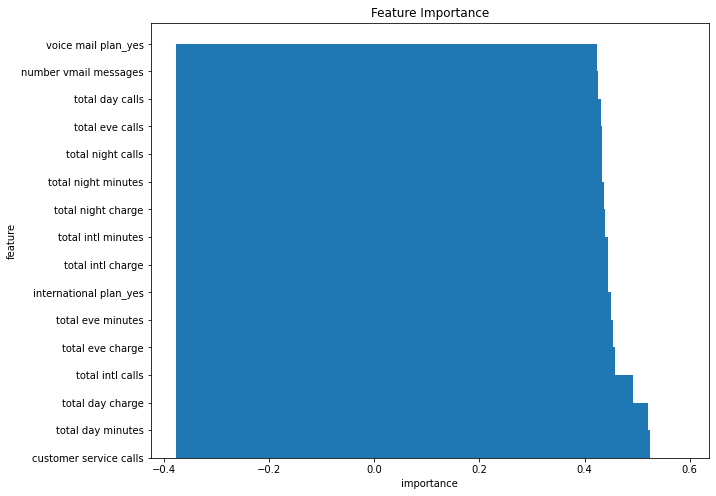

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,8])

plt.bar(x=feature_importances['importance'], height=feature_importances['feature'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('Feature Importance')

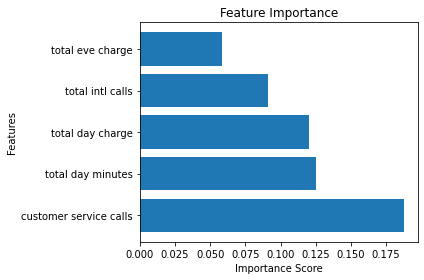

In [39]:

# Top Five important features
data = {"customer service calls": 0.188038, "total day minutes": 0.125113, "total day charge": 0.12004, "total intl calls": 0.091361, "total eve charge": 0.058763}

# Plotting the bar graph
fig, ax = plt.subplots()
ax.barh(list(data.keys()), list(data.values()))

# Customizing the appearance of bar graph
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")

# Spacing the bars apart
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# Showing the graph
plt.tight_layout()
plt.show()


From our feature importance plot customer service calls, total day minutes and total day charge are identified as the most important features contributing to customer churn.The telco can therefor give more attention to improving customer satisfaction through customer experience, enhancement of their services and implementing strategies aimed at reducing the day time charges. The telco should also keep track of the number of customer service calls, as a high number of such calls may indicate dissatisfaction among the customers. These insights can be used to design targeted retention and engagement programs, aimed at reducing churn and improving customer satisfaction.

# Model Deployment

In [35]:
import pickle

# Your trained model
model = rf2

# Save the model to a pickle file
with open("Customer_Churn_RFC.pkl", "wb") as file:
    pickle.dump(model, file)
